In [8]:
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os
import acquire
import prepare

In [9]:
df = acquire.get_telco_db('telco_churn')

In [10]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


<AxesSubplot:xlabel='churn', ylabel='count'>

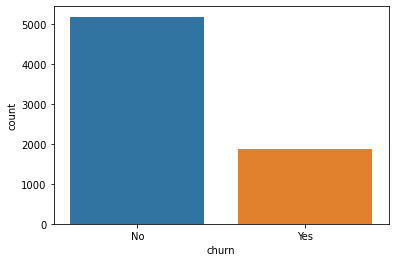

In [12]:
# Visualizing Churn
sns.countplot(df['churn'])

In [27]:
# Get percentages of churned and not churned

not_churned = df[df['churn']=='No']
churned = df[df['churn']=='Yes']

print(len(not_churned)/(len(churned)+len(not_churned)) * 100, '% of customers stayed with the company')
print(len(churned)/(len(churned)+len(not_churned)) * 100, '% of customers left the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers left the company


<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

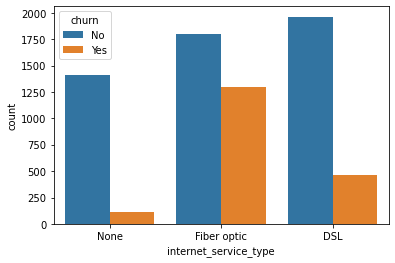

In [28]:
# Visualizing Churn by internet_service_type

sns.countplot(x='internet_service_type', hue='churn', data=df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'monthly_charges'}>], dtype=object)

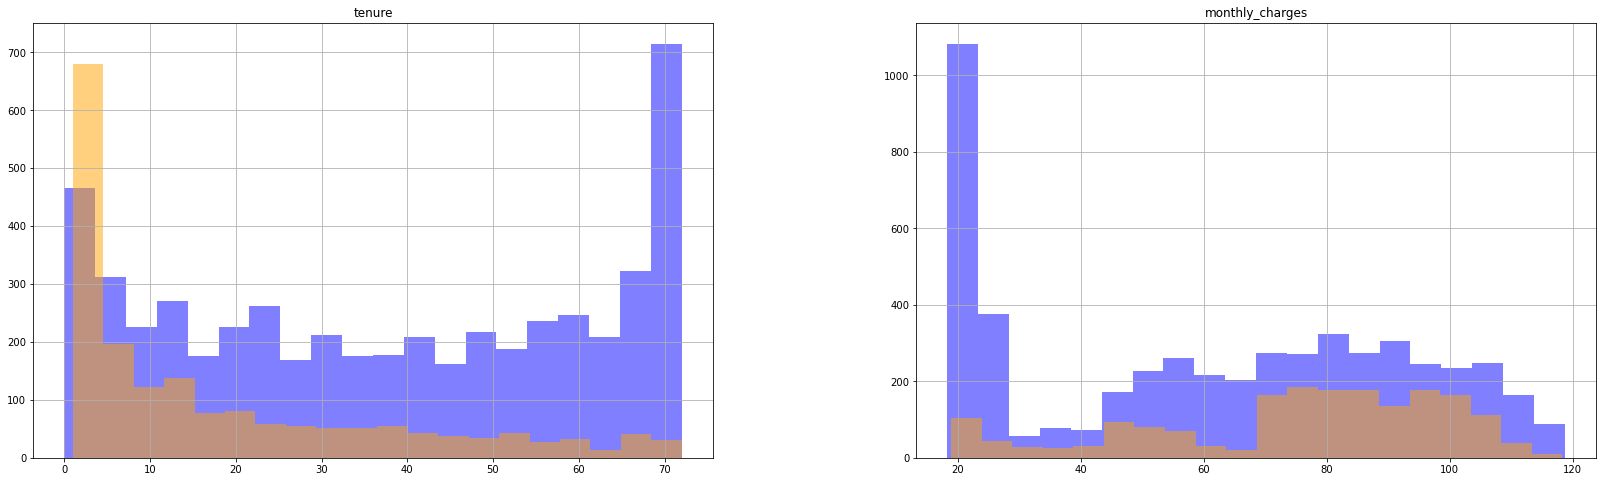

In [38]:
# Visualizing churn based on tenure and monthly_charges

features = ['tenure','monthly_charges']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
not_churned[features].hist(bins=20, color='blue', alpha=0.5, ax = ax)
churned[features].hist(bins=20, color='orange', alpha=0.5, ax = ax)
